In [1]:
import numpy as np
list1 = [1,2,3,4,5]
array = np.array(list1)
print(array+array)
matr = [list1,list1, list1, list1, list1]
print(matr)
matr_np = np.array(matr)
print(matr_np)
matr_np[1:4,2:5]

[ 2  4  6  8 10]
[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5]]
[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]]


array([[3, 4, 5],
       [3, 4, 5],
       [3, 4, 5]])

## Creazione dati

In [ ]:
X = [[6,20],[8.,25],[15,32], [18,60],[25,70],[33,70],[50,82],[25,75]]
X = np.array(X)
X

array([[ 6., 20.],
       [ 8., 25.],
       [15., 32.],
       [18., 60.],
       [25., 70.],
       [33., 70.],
       [50., 82.],
       [25., 75.]])

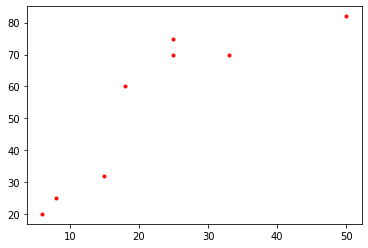

In [ ]:
import matplotlib.pyplot as plt
eta = X[:,0] #tutte le righe colonna 0
peso = X[:,1] #tutte le righe colonna 1
plt.plot(eta, peso,'.',c = 'red')
plt.show()

 ###  Creazione modello


[ 12.  16.  30.  36.  50.  66. 100.  50.]


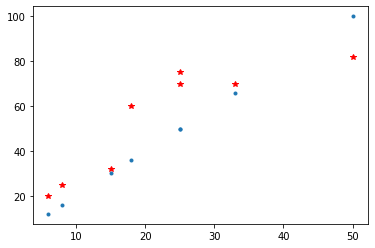

In [ ]:
def modello(x, theta):
    return theta * x

pred = modello(eta, 2)
print(pred)
plt.plot(eta, peso,'*',c='red',label='real')
plt.plot(eta, pred, '.',label = 'pred')

In [ ]:
errors = (peso-pred).sum()
errors

74.0

18585.0		-3
12176.25		-2
7139.5		-1
3474.75		0
1182.0		1
261.25		2
712.5		3
2535.75		4
5731.0		5
10298.25		6
16237.5		7
23548.75		8
32232.0		9


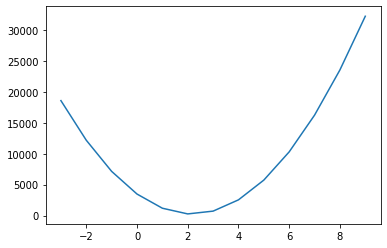

In [ ]:
l = []
def loss(target,pred):
    return ((target-pred)**2).mean() #al quadrato perche più preciso

thet_val = list(range(-3,10))
for thet in thet_val:
    pred = modello(eta, thet)
    errors = loss(peso,pred)
    l.append(errors)
    print(errors, thet, sep='\t\t')

plt.plot(thet_val, l) #LOSS FUNCTIONS per ogni valore del parametro ho il valore di errore trovo il minore

## Discesa del gradiente | Gradient Descent

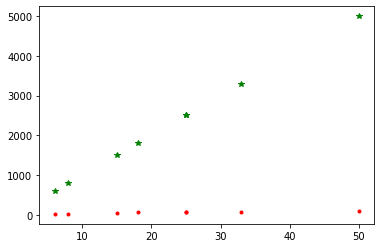

STEP 0 LOSS 6386682.163079452 THETA 98.6577875
STEP 50 LOSS 1604526.2805957166 THETA 50.53025728800894
STEP 100 LOSS 403240.3848009777 THETA 26.408724569752742
STEP 150 LOSS 101475.27322835712 THETA 14.319005065863978
STEP 200 LOSS 25671.351046958327 THETA 8.259633988996727
STEP 250 LOSS 6629.273624099239 THETA 5.222675370116835
STEP 300 LOSS 1845.8705739185812 THETA 3.7005507905544777
STEP 350 LOSS 644.2713874238265 THETA 2.9376614902839333
STEP 400 LOSS 342.42757668111085 THETA 2.5553011419380582
STEP 450 LOSS 266.6038851309646 THETA 2.3636620195446345
STEP 500 LOSS 247.55684160820672 THETA 2.267612433360819
STEP 550 LOSS 242.77219106507263 THETA 2.219472351675709
STEP 600 LOSS 241.57027850617288 THETA 2.1953445281553243
STEP 650 LOSS 241.26835597573557 THETA 2.183251655699503
STEP 700 LOSS 241.1925125096609 THETA 2.1771907043621717
STEP 750 LOSS 241.17346049874308 THETA 2.1741529537162685
STEP 800 LOSS 241.16867460038168 THETA 2.1726304321725216
STEP 850 LOSS 241.1674723743686 THETA

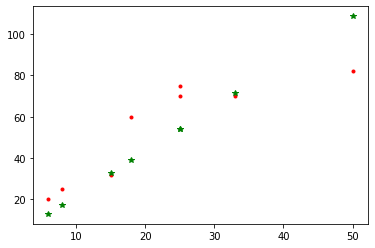

In [ ]:
def loss_derivative(x, theta):
    der =  (2*(theta*x-peso)*x).mean()
    return der
theta =100

pred = modello(eta, theta)
plt.plot(eta,peso,'.',c='red')
plt.plot(eta,pred,'*',c='green')
plt.show()
passo = 0.00001
loss_list = []
for step in range(1000):
    theta = theta - passo * loss_derivative(eta, theta) #Update rule
    pred = modello(eta,theta) # predizione con il parametro aggiornato appena calcolato
    errore = loss(peso,pred) #verifica delle performance
    loss_list.append(errore)
    if step % 50 == 0:
        print('STEP',step,'LOSS', errore,'THETA',theta)
        
pred = modello(eta,theta) #il modello si è auto regolato trovando il parametro migliore
plt.plot(eta,peso,'.',c='red')
plt.plot(eta,pred,'*',c='green')
plt.show()

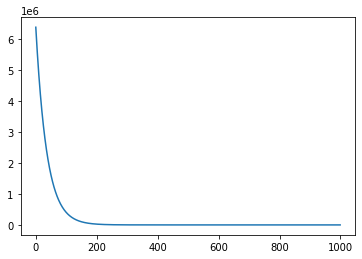

In [59]:
plt.plot(range(len(loss_list)),loss_list,label='loss')

## Dataset creation
A partire da eta, numero di scarpe, altezza stimiamo il PESO


In [65]:
D = [[20,41,170,82], [30,40,180,90],[25,44,190,90],[50,42,160,80]]
D = np.array(D)
X = D[:,0:3]
target = D[:,3]

print(X)
print(D)
print(target)

[[ 20  41 170]
 [ 30  40 180]
 [ 25  44 190]
 [ 50  42 160]]
[[ 20  41 170  82]
 [ 30  40 180  90]
 [ 25  44 190  90]
 [ 50  42 160  80]]
[82 90 90 80]


## Model definition


In [93]:
def layer(x, W):
#     print(x.shape) 4,3
#     print(W.shape)  3,1
    return np.matmul(x,W) #matrix multiplication

array([0.96834229, 0.10123618, 0.68472882])

## Test del modello

In [106]:
preds = layer(X, W)
print('X: \n', X)
print('Predictions: \n', preds)
print('Target: \n', target)

X: 
 [[ 20  41 170]
 [ 30  40 180]
 [ 25  44 190]
 [ 50  42 160]]
Predictions: 
 [139.92142901 156.35090393 158.76142544 162.2256456 ]
Target: 
 [82 90 90 80]


## Calcolo della loss / Definizione


In [121]:
def loss(pred, target):
#     return ((pred-target)**2)
    return ((pred-target)**2).mean()

def loss_derivative(x, w):
    der =  (2*(theta*x-peso)*x).mean()
    return der


In [122]:
error = loss(preds,target)

In [123]:
print(error)

4811.631203814316


## Inizializziamo i pesi del layer
Numero di neuroni in input = numero di features



C:\Users\Mattia\AppData\Local\Temp/ipykernel_10352/969882289.py:3: RuntimeWarning: overflow encountered in double_scalars
  return ((pred-target)**2).mean()
C:\Users\Mattia\AppData\Local\Temp/ipykernel_10352/2917412981.py:4: RuntimeWarning: overflow encountered in matmul
  return np.matmul(x,W) #matrix multiplication
C:\Users\Mattia\AppData\Local\Temp/ipykernel_10352/3040433124.py:15: RuntimeWarning: invalid value encountered in subtract
  W = W - LR*2*(p-target[i])* e
C:\Users\Mattia\Desktop\Davide\Machine learning\my_env\lib\site-packages\matplotlib\ticker.py:2222: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


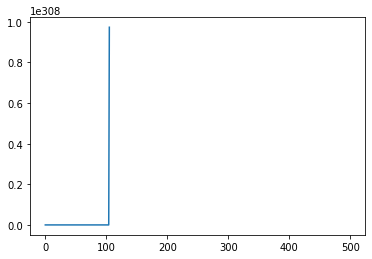

In [129]:
# theta = w - \alpha DL/Dw
# dL/dw = 2*(layer(X,W)-target)*X
n_feats = 3
#genero vettore di pesi random
W = np.random.rand(n_feats)
error_list = []
LR = 0.001
for epoch in range(100):
    tot_loss = 0. 
    for i, e in enumerate(X):
        p = layer(e, W)
        loss_dp = loss(p, target[i])
        tot_loss += error
        error_list.append(loss_dp)
        W = W - LR*2*(p-target[i])* e
    error_list.append(tot_loss)
plt.plot(list(range(len(error_list))),error_list)
plt.show()